In [ ]:
!pip install -Uqq fastai 

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.CIFAR)

In [ ]:
cifar_block = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                        get_items=get_image_files, 
                        get_y=parent_label, 
                        splitter=GrandparentSplitter(valid_name='test'))

In [ ]:
dls = cifar_block.dataloaders(path)

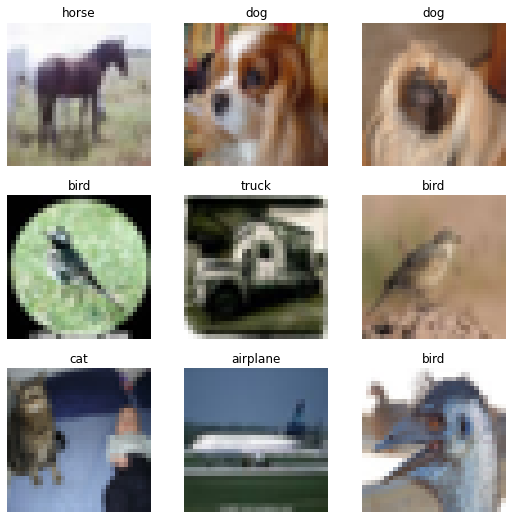

In [7]:
dls.show_batch()

## Baseline without augmentation


The website reports initial baseline result of 18% test error without data augmentation and 11% with.

In [11]:
learn = cnn_learner(dls, resnet34, nn.CrossEntropyLoss, metrics=[accuracy], lr=3e-3)

SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=0.00363078061491251)

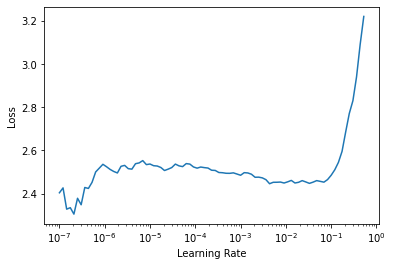

In [10]:
learn.lr_find()

In [12]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.645821,1.466292,0.486900,01:17


epoch,train_loss,valid_loss,accuracy,time
0,0.955470,0.824586,0.716400,01:23
1,0.733395,0.642834,0.782300,01:24
2,0.529231,0.606951,0.798100,01:24
3,0.288101,0.612031,0.805400,01:23
4,0.191379,0.639353,0.811100,01:24


In [ ]:
learn.recorder.plot_loss()

## Baseline with augmentation

In [15]:
cifar_block_aug = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                        get_items=get_image_files, 
                        get_y=parent_label, 
                        splitter=GrandparentSplitter(valid_name='test'),
                        item_tfms=Resize(48),
                        batch_tfms=aug_transforms(size=32, min_scale=0.75))

In [16]:
aug_dls = cifar_block_aug.dataloaders(path)

In [17]:
learn = cnn_learner(aug_dls, resnet34, nn.CrossEntropyLoss, metrics=[accuracy], lr=3e-3)

In [18]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.675583,1.522826,0.464300,01:43


epoch,train_loss,valid_loss,accuracy,time
0,1.048337,0.938771,0.670400,01:49
1,0.816879,0.721752,0.752800,01:49
2,0.709294,0.636608,0.780900,01:48
3,0.581192,0.581478,0.799900,01:48
4,0.516083,0.569285,0.805100,01:49


Huh, augmentation adds 20s on each epoch. 
The problem is now harder to train, so we need to can train for additional epochs to see whether augmentation gives better generalisation!

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=2.2908675418875646e-06)

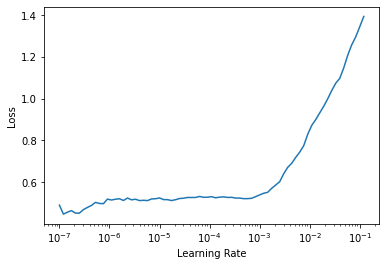

In [20]:
learn.lr_find()

In [21]:
learn.fit_one_cycle(5, lr_max=3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.746427,0.760325,0.749800,01:50
1,0.649749,0.595845,0.794400,01:50
2,0.520120,0.502053,0.824600,01:51
3,0.421415,0.456069,0.847000,01:50
4,0.356691,0.434230,0.853800,01:49


In [ ]:
learn.recorder.plot_loss()

## Baseline without augmentation (smaller resnet)

In [22]:
learn = cnn_learner(dls, resnet18, nn.CrossEntropyLoss, metrics=[error_rate], lr=3e-3)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn.recorder.plot_loss()

## Baseline Mixed Precision

In [13]:
learn = cnn_learner(dls, resnet34, nn.CrossEntropyLoss, metrics=[accuracy], lr=3e-3)
learn.to_fp16()

In [14]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.614203,1.442570,0.495900,01:23


epoch,train_loss,valid_loss,accuracy,time
0,0.926097,0.828929,0.707200,01:32
1,0.718838,0.658365,0.773200,01:31
2,0.490115,0.575535,0.803000,01:32
3,0.306855,0.599937,0.810100,01:31
4,0.177536,0.630419,0.809400,01:30


Huh, not really seeing a speedup at all.

## With Normalisation

## With Progressive Resizing

## With Mixup

## With Label Smoothing

## TTA